In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('billboard.csv')

# Group by both performer, song, and year to handle multiple unique songs with the same title
grouped = data.groupby(['performer', 'song', 'year'])

# Calculate the total number of weeks each song appeared in the Billboard Top 100
song_weeks = grouped['week'].nunique().reset_index()

# Group by performer and song to calculate the total number of weeks for each song
song_total_weeks = song_weeks.groupby(['performer', 'song'])['week'].sum().reset_index()

# Sort the songs by the total number of weeks in descending order
sorted_songs = song_total_weeks.sort_values(by='week', ascending=False)

# Select the top 10 most popular songs
top_10_songs = sorted_songs.head(10)

# Display the resulting table
top_10_songs_table = top_10_songs.rename(columns={'week': 'count'})
top_10_songs_table.reset_index(drop=True, inplace=True)
top_10_songs_table.index += 1  # Start index from 1

# Print the table
top_10_songs_table

,performer,song,count
1,Imagine Dragons,Radioactive,87
2,AWOLNATION,Sail,79
3,The Weeknd,Blinding Lights,76
4,Jason Mraz,I'm Yours,76
5,LeAnn Rimes,How Do I Live,69
6,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
7,OneRepublic,Counting Stars,68
8,Jewel,Foolish Games/You Were Meant For Me,65
9,Adele,Rolling In The Deep,65
10,Carrie Underwood,Before He Cheats,64


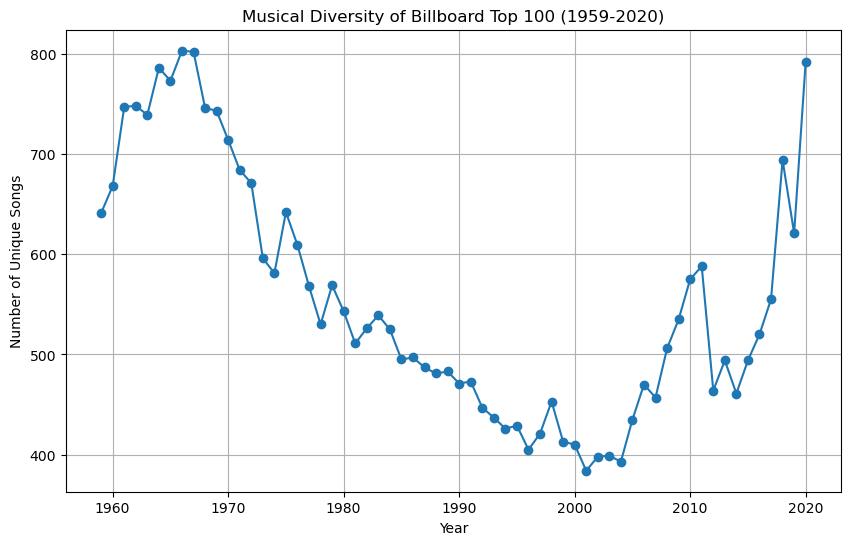

In [3]:
# Filter out the years 1958 and 2021
filtered_data = data[(data['year'] != 1958) & (data['year'] != 2021)]

# Group by year and song to count the number of times each song appeared in the Top 100 in a given year
songs_per_year = filtered_data.groupby(['year', 'song'])['song'].count().reset_index(name='count')

# Group by year to count the number of unique songs in each year
unique_songs_per_year = songs_per_year.groupby('year')['song'].count().reset_index(name='unique_count')

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(unique_songs_per_year['year'], unique_songs_per_year['unique_count'], marker='o')
plt.title("Musical Diversity of Billboard Top 100 (1959-2020)")
plt.xlabel("Year")
plt.ylabel("Number of Unique Songs")
plt.grid(True)
plt.show()

The line plot above depcts the number of unique songs that show up every year in the Billboard top 100. Having removed the years 1958 and 2021, we have excluded years with incomplete data. There's a strong trend here where starting from around 1966, there was a downward slope in the amount of unique songs appearing each year up until around 2001. From there, the the amount of unique songs begin skyrocketing once more, despite another small dip in the early 2010's. The downward slope may be due to a lack of new music genres and artists appearing between 1960 and 2000. On the other than, the steep rise afterwards could perhaps be attributed to new handheld technology that made listening to music more popular, such as the ipod. 

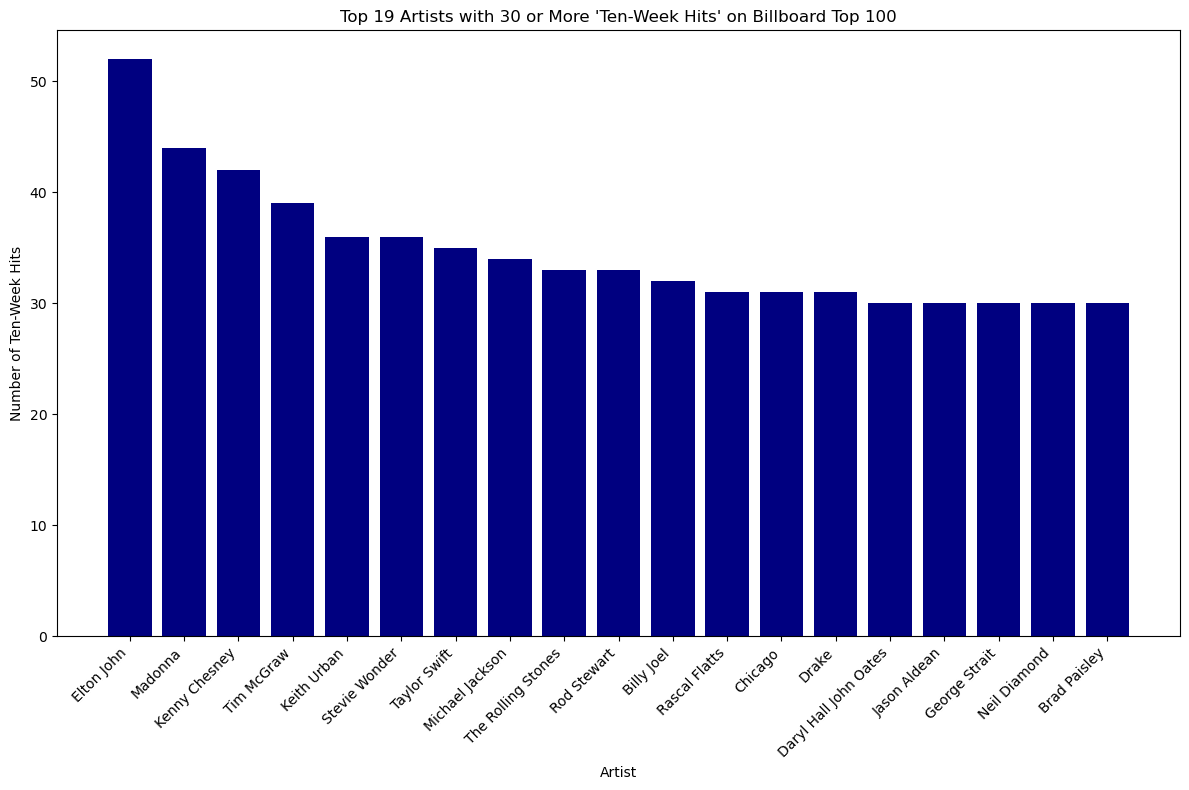

In [4]:
# Calculate the number of weeks each song appeared on the Top 100
song_weeks = data.groupby(['performer', 'song'])['week'].nunique().reset_index()

# Filter songs that were "ten-week hits"
ten_week_hits = song_weeks[song_weeks['week'] >= 10]

# Count the number of "ten-week hits" for each performer
artist_ten_week_hits = ten_week_hits['performer'].value_counts().reset_index()
artist_ten_week_hits.columns = ['performer', 'num_ten_week_hits']

# Filter out artists with fewer than 30 "ten-week hits"
top_artists = artist_ten_week_hits[artist_ten_week_hits['num_ten_week_hits'] >= 30]

# Sort the data in descending order
top_artists = top_artists.sort_values(by='num_ten_week_hits', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_artists['performer'], top_artists['num_ten_week_hits'], color='Navy')
plt.title("Top 19 Artists with 30 or More 'Ten-Week Hits' on Billboard Top 100")
plt.xlabel("Artist")
plt.ylabel("Number of Ten-Week Hits")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

The bar chart above shows the 19 artists with 30 or more songs that have appeared on the Billboard Top 100 for at least ten weeks. In descending order, Elton John has had, by proportion, the most number of ten-week hits compared to everyone else in the list. Madonna comes after him, then the bars trickle lower before flattening out at 30 where 5 of the 19 artists sit. 